# This notebook shows the codes for the "Module extraction", "Module membership analysis" and "Module DE/diagnostic correlation" modules

In [1]:
%pip install -q -r requirements1.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
sys.path.append("..")
from src.eda.eda_functions import *
import pandas as pd

# Load outputs from the network analysis module

In [3]:
%%time
#from sys import platform
#prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'
#tom_df = pd.read_csv(prefix+'/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv', index_col = 0)
tom_df = pd.read_csv('../data/Kapoor_TOM.csv', index_col = 0)

CPU times: user 3min 50s, sys: 10.4 s, total: 4min
Wall time: 4min 3s


In [4]:
%%time
## load the module assignment by WGCNA
wgcna_modules = pd.read_csv('../data/notebooks/Module 1-4 outputs/wgcna_modules.csv')

CPU times: user 10.7 ms, sys: 3.45 ms, total: 14.1 ms
Wall time: 13.8 ms


# Module extraction (by Louvain algorithm) 

In [5]:
%%time
module_df1 = run_louvain(tom_df, 1, -1) # default setting
module_df2 = run_louvain(tom_df, 1, 1) # User can change the setting for different module assignment result

CPU times: user 3min, sys: 48 s, total: 3min 48s
Wall time: 3min 59s


In [6]:
module_df1.to_csv('../data/notebooks/Module 1-4 outputs/network_louvain_default.csv', index = 0)
module_df2.to_csv('../data/notebooks/Module 1-4 outputs/network_louvain_agg1.csv', index = 0)

# Module membership analysis 

Removing existing folder: output
Created folder output


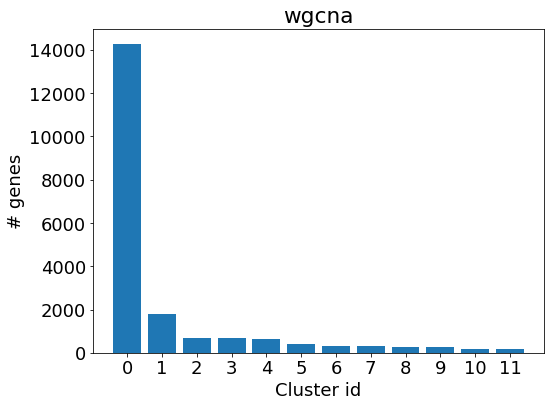

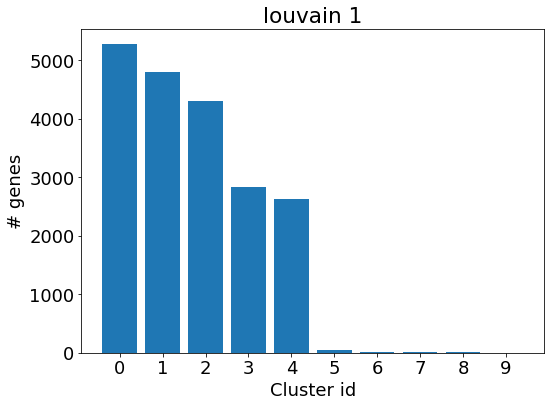

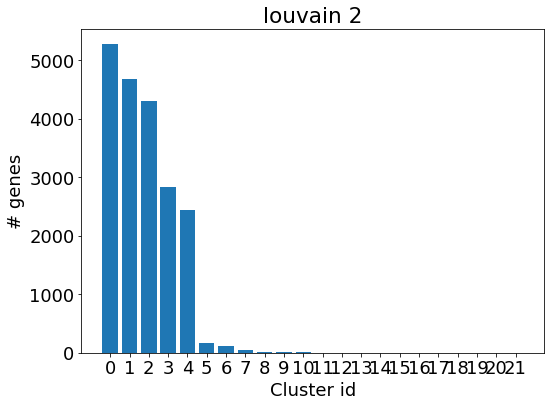

CPU times: user 1.23 s, sys: 235 ms, total: 1.47 s
Wall time: 870 ms


In [7]:
%%time
module_dfs = [wgcna_modules, module_df1, module_df2]
module_df_names = ['wgcna','louvain 1', 'louvain 2']
for module_df, name in zip(module_dfs, module_df_names):
    plot_gene_cnt_each_cluster_v2(module_df, name)

In [8]:
## Join expression with subjects' alcohol traits

In [9]:
%%time
# normalized expression data
expression = pd.read_csv('../data/kapoor_expression_Apr5.txt',sep = '\t', index_col = 0)
print(expression.head())

                     X214      X460      X584      X551      X530      X571  \
ENSG00000227232  3.338977  2.541341  2.071838  2.965866  3.379590  2.798270   
ENSG00000237683  4.307635  2.229991  3.249317  2.268162  3.717559  4.187835   
ENSG00000241860  1.718635  0.797516  0.653183  1.023589  1.858563  0.395509   
ENSG00000228463  4.071199  2.685933  3.168998  3.650939  2.835683  2.535530   
ENSG00000225972  5.493089  6.076272  5.428418  6.999395  6.411183  5.978701   

                     X327      X723      X637      X620  ...      X650  \
ENSG00000227232  2.604569  2.639657  2.184402  3.271659  ...  2.219311   
ENSG00000237683  2.961062  2.652538  3.718212 -0.025446  ...  1.850218   
ENSG00000241860  1.587088 -1.532636  0.773850  1.945457  ...  0.372500   
ENSG00000228463  4.141246 -1.359367  3.421403  3.163712  ...  3.066318   
ENSG00000225972  6.467461  6.802559  5.921182  7.068211  ...  6.081443   

                     X693   X88.225   X88.274   X88.304   X89.221   X89.577  \
E

In [10]:
%%time
# metadata (alcohol traits)
meta = pd.read_csv('../data/kapoor2019_coga.inia.detailed.pheno.04.12.17.csv', low_memory = False)
print(meta.head())
expression_meta = pd.merge(expression.T, meta, left_index = True, right_on = 'IID')
expression_meta.to_csv('../data/notebooks/Module 1-4 outputs/expression_meta_Apr6.csv', index = 0)

   SUNumber   IID RNAsequencedby Frozentissue   BMI  RIN  Age  Gender  \
0     214.0  X214           INIA         Left  35.0  7.0   48  Female   
1     460.0  X460           INIA        Right  22.0  7.4   49  Female   
2     584.0  X584           INIA        Right  22.0  7.3   52  Female   
3     551.0  X551           INIA        Right  41.0  7.6   51  Female   
4     530.0  X530           INIA        Right  23.0  7.6   56  Female   

  Ethnicity Alc_status  ...  Agonal_phase Liver_class  \
0  European  Alcoholic  ...         Rapid   Steatosis   
1  European    Control  ...         Rapid      Normal   
2  European  Alcoholic  ...         Rapid      Normal   
3  European    Control  ...  Intermediate   Steatosis   
4  European  Alcoholic  ...         Rapid      Normal   

              Smoking_frequency Pack_yrs_1_pktperday_1_yr  AUDIT  \
0             99 - Not reported                       NaN  186.0   
1             99 - Not reported                       NaN    NaN   
2  01 - Everyd

In [11]:
expression_meta.head()

,ENSG00000227232,ENSG00000237683,ENSG00000241860,ENSG00000228463,ENSG00000225972,ENSG00000225630,ENSG00000237973,ENSG00000229344,ENSG00000248527,ENSG00000198744,...,Agonal_phase,Liver_class,Smoking_frequency,Pack_yrs_1_pktperday_1_yr,AUDIT,Alcohol_intake_gmsperday,Total_drinking_yrs,Depression,Anxiety,SR
0,3.338977,4.307635,1.718635,4.071199,5.493089,7.081400,9.131822,6.364326,7.658865,7.136485,...,Rapid,Steatosis,99 - Not reported,NaN,186.0,266.0,23.0,Yes,No,1
1,2.541341,2.229991,0.797516,2.685933,6.076272,8.253067,9.791742,6.575031,8.250013,7.371292,...,Rapid,Normal,99 - Not reported,NaN,NaN,NaN,NaN,No,No,2
2,2.071838,3.249317,0.653183,3.168998,5.428418,7.249520,8.760305,6.017873,7.675782,6.844749,...,Rapid,Normal,01 - Everyday/7days per week,42.0,42.0,102.0,27.0,Yes,No,3
3,2.965866,2.268162,1.023589,3.650939,6.999395,8.737079,9.992433,7.467388,8.786898,7.822267,...,Intermediate,Steatosis,99 - Not reported,NaN,0.0,0.0,NaN,No,No,4
4,3.379590,3.717559,1.858563,2.835683,6.411183,8.400833,9.409261,7.082551,8.379987,7.804902,...,Rapid,Normal,01 - Everyday/7days per week,38.0,56.0,136.0,31.0,Yes,No,5


## Determine network stability

In [12]:
%%time
cluster_pair_wgcna_n_com1, network_cluster_stability1 = network_cluster_stability(wgcna_modules, module_df1, 'cluster_id', expression_meta)

CPU times: user 17min 38s, sys: 4min 34s, total: 22min 13s
Wall time: 4min 54s


### The histograms below show distribution for z scores for p value or correlation coefficient if the cluster membership is randomly assigned. The red vertical line is where the actual Z score is. For p value, the red line should be as left as possible for small p values for the actual cluster, meaning it's very unlikely that the module membership is randomly assigned. For correlation coefficient, a very left or very right red veritcal line is good, meaning there is a strong (positive or negative) correlation between the two clusters)

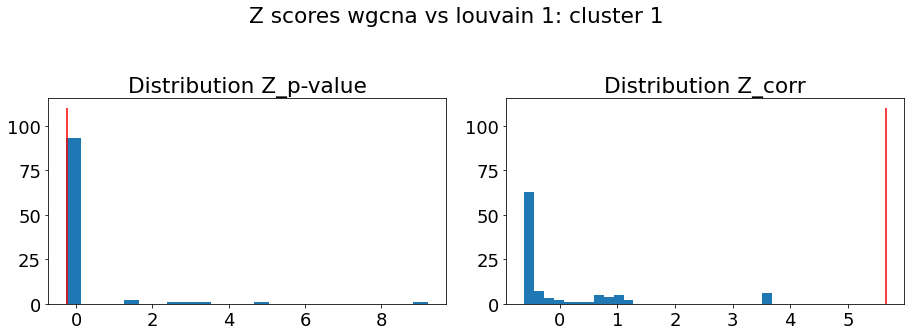

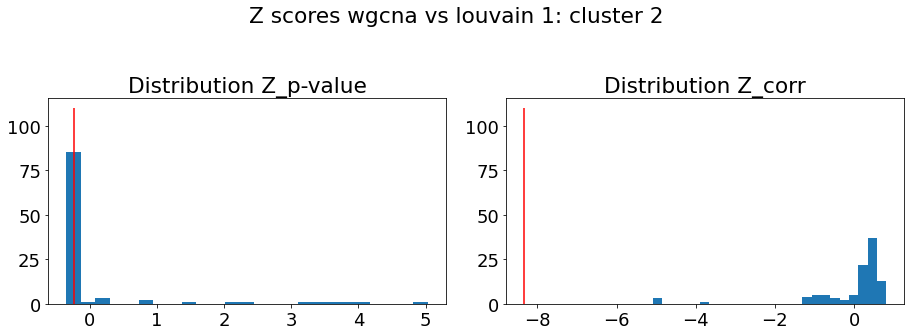

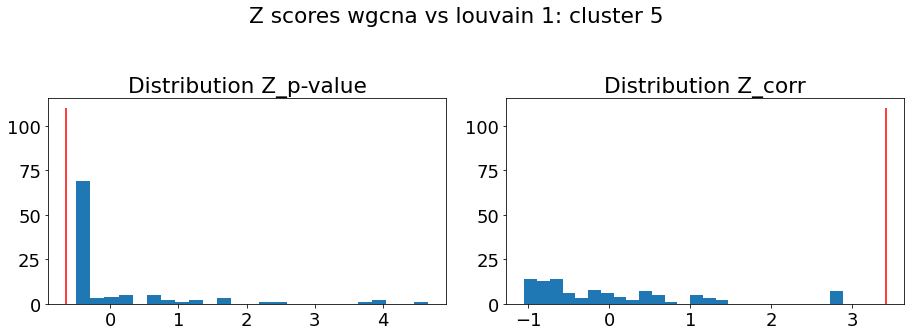

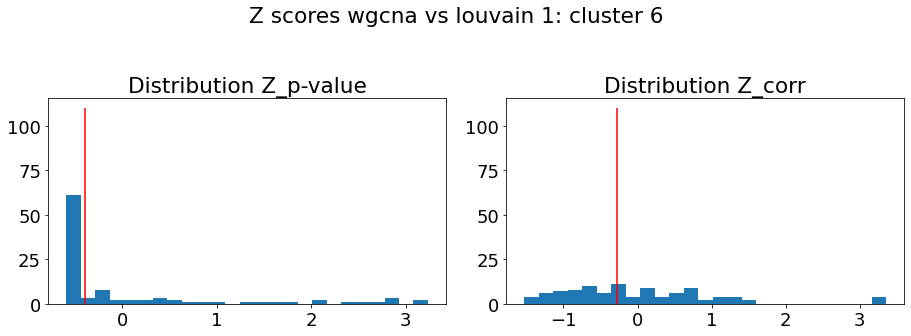

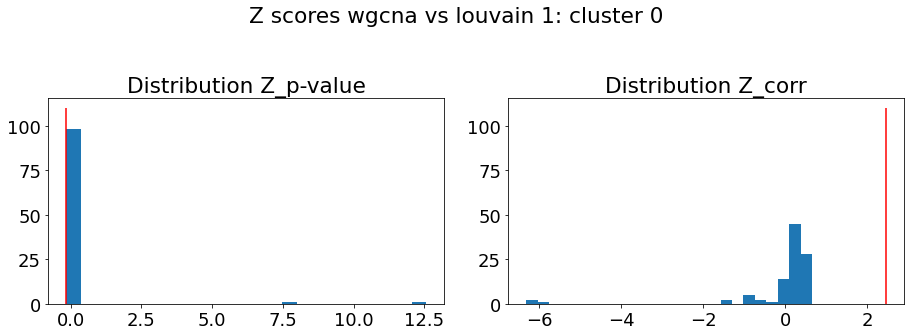

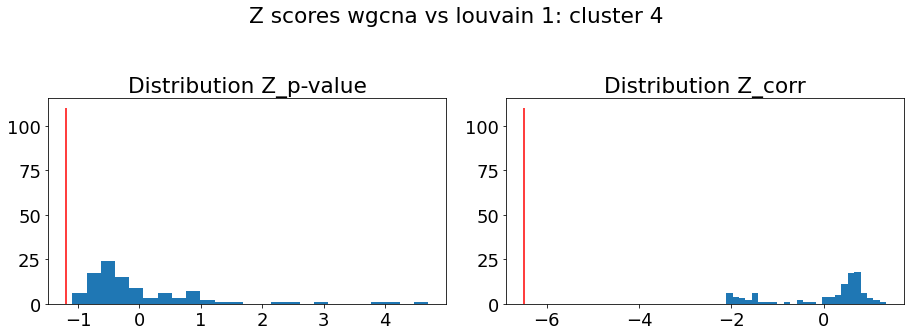

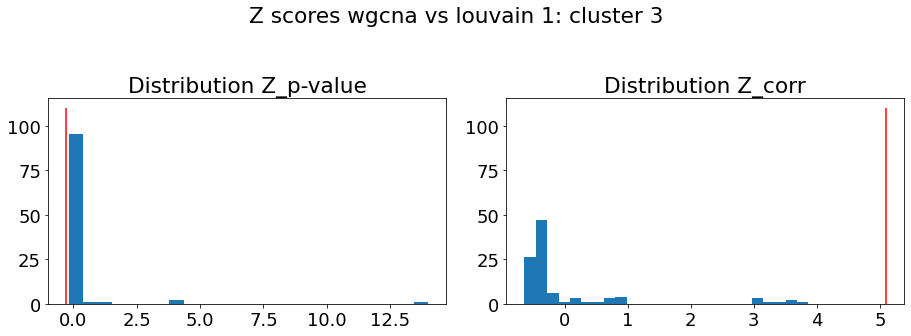

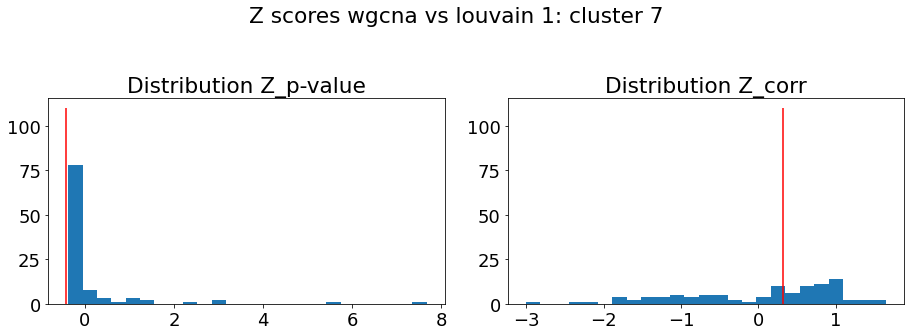

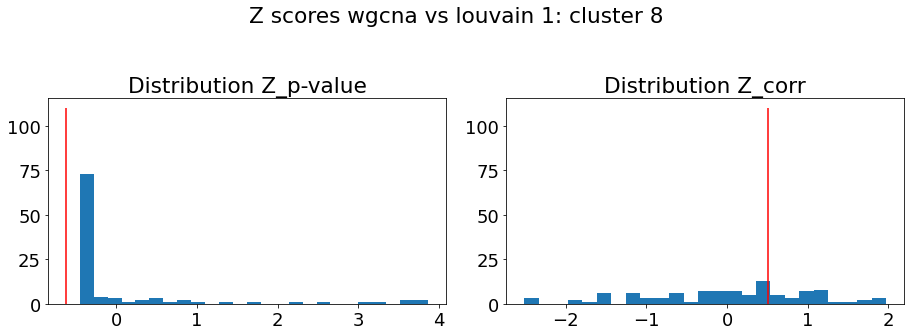

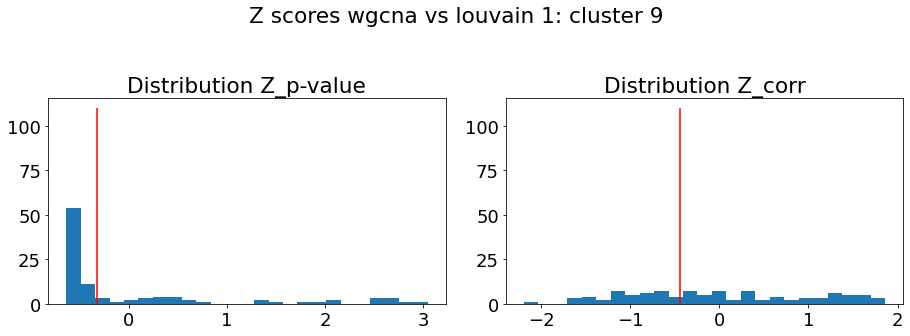

CPU times: user 14min 31s, sys: 3min 35s, total: 18min 6s
Wall time: 4min 12s


In [13]:
%%time
for cluster in module_df1.cluster_id.unique():
    plot_random_vs_actual_z(wgcna_modules, module_df1, cluster_pair_wgcna_n_com1[cluster], cluster, 'cluster_id', network_cluster_stability1, 'wgcna vs louvain 1', expression_meta)

# Module DE/ diagnostic correlation

In [14]:
# use deseq data to examine DEG and module correlation
deseq = pd.read_excel('../data/deseq.alc.vs.control.age.rin.batch.gender.PMI.corrected.w.prot.coding.gene.name.xlsx')
deseq['abs_log2FC'] = abs(deseq['log2FoldChange'])

In [15]:
module_dfs = [wgcna_modules, module_df1, module_df2]
module_df_names = ['wgcna','louvain 1', 'louvain 2']

## Method 1: DEGs per module for 3 types of module assignment

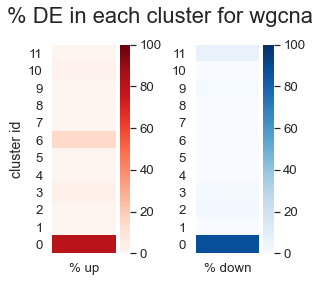

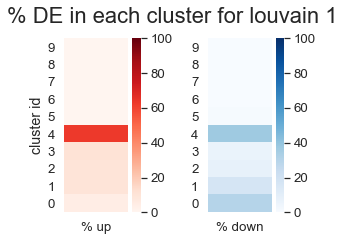

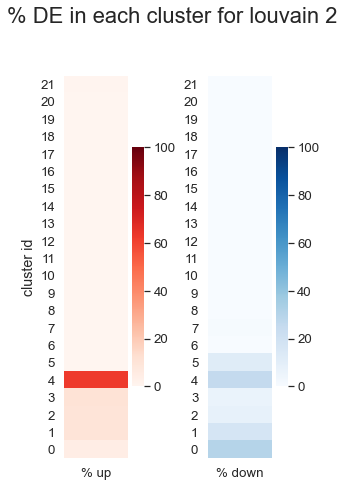

CPU times: user 1.63 s, sys: 72 ms, total: 1.71 s
Wall time: 1.71 s


In [16]:
%%time
for module_df, name in zip(module_dfs, module_df_names):
    cluster_DE_perc(module_df, name, deseq)

### Louvain 1 module assignment will be used for downstream analysis as it aggregates DEGs into a single module effectively. WGCNA seems to be doing that but if you look at the bar plots under "Module membership analysis", WGCNA does that by putting all the nodes in cluster 0 so it is not really aggregating DEGs but just putting all the nodes in 1 module. 

## Method 2: Percentage of significant genes for each module for 3 types of module assignment

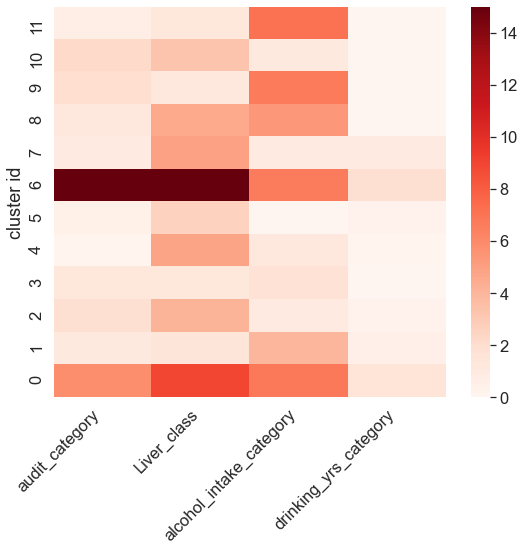

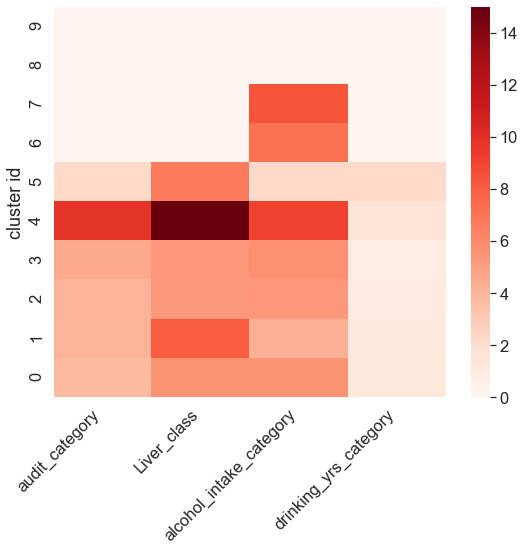

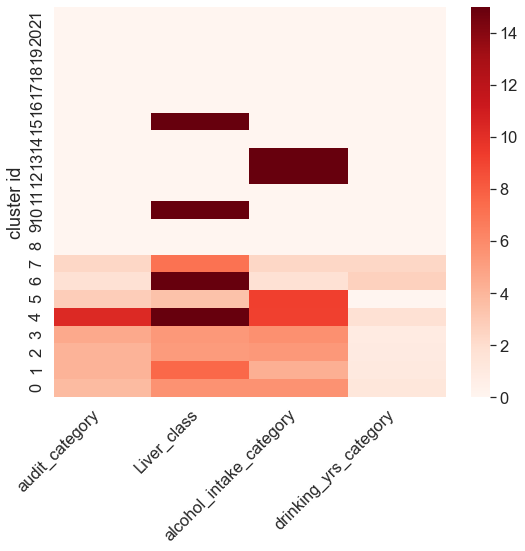

CPU times: user 11min 23s, sys: 1min 31s, total: 12min 55s
Wall time: 12min 55s


In [17]:
%%time
for module_df, name in zip(module_dfs, module_df_names):
    plot_sig_perc(module_df, name, expression_meta)

## Method 3: Module eigengene and alcohol trait correlation for 3 types of module assignment

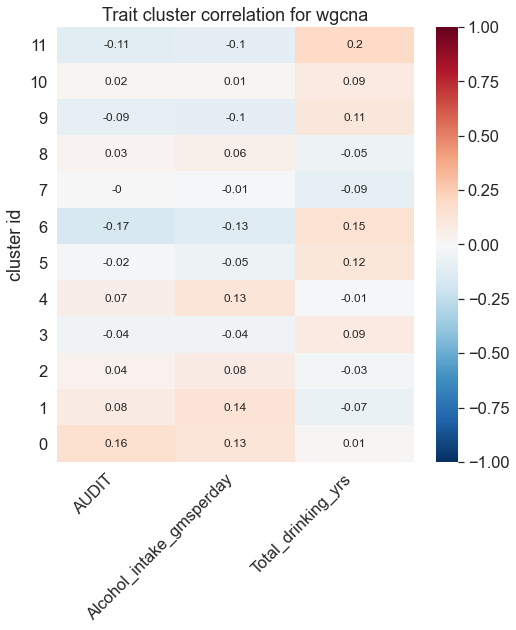

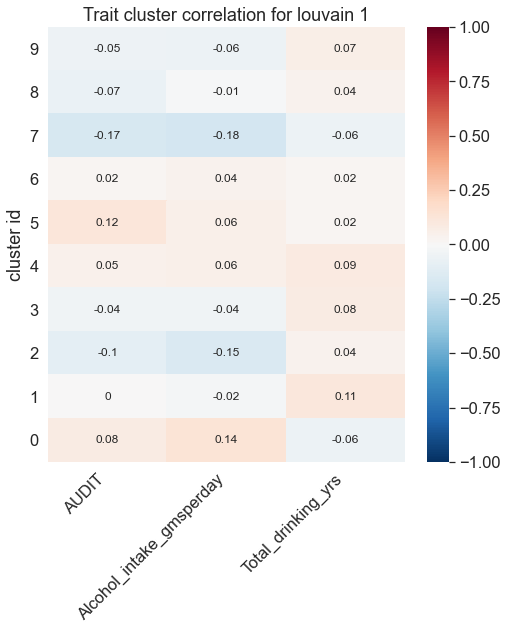

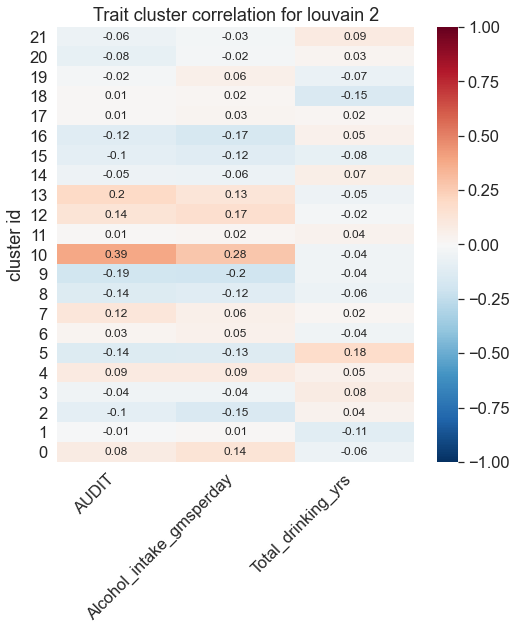

CPU times: user 26.5 s, sys: 10.2 s, total: 36.7 s
Wall time: 9.17 s


In [18]:
%%time
for module_df, name in zip(module_dfs, module_df_names):
    cluster_phenotype_corr(module_df, name, expression_meta)